In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

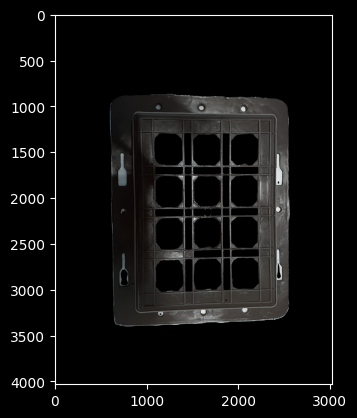

In [3]:
cover = cv2.imread('./Box/box_crop.png')

plt.imshow(cover)

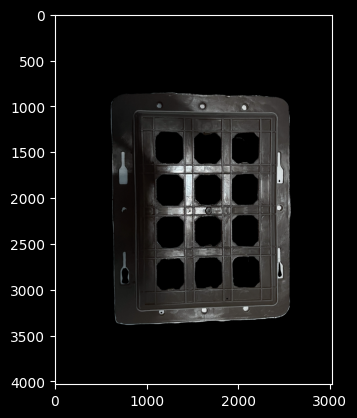

In [4]:
cover_fullmesh = cv2.imread('./Box/box_fullmesh.png')

plt.imshow(cover_fullmesh)

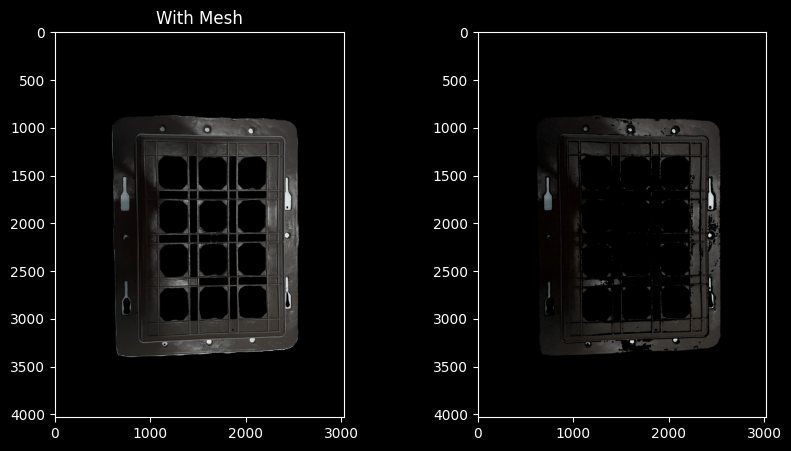

In [5]:
# use canny to remove mesh of cover
edges = cv2.Canny(cover, 200, 255)
cover[edges == 255] = 0

erocopy = cover.copy()

square_kernel = np.array([[1, 1, 0, 1, 1],
                            [1, 1, 0, 1, 1],
                            [0, 0, 0, 0, 0],
                            [1, 1, 0, 1, 1],
                            [1, 1, 0, 1, 1]], np.uint8)
rem_mesh_cover = cv2.erode(erocopy, square_kernel, iterations = 2)
with_mesh = cover

# subplots of original and without mesh cover

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(with_mesh)
axs[0].set_title('With Mesh')
axs[1].imshow(rem_mesh_cover)

plt.show()

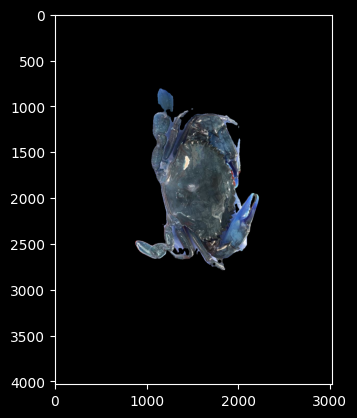

In [6]:
crab = cv2.imread('./crab/crab.png')

plt.imshow(crab)

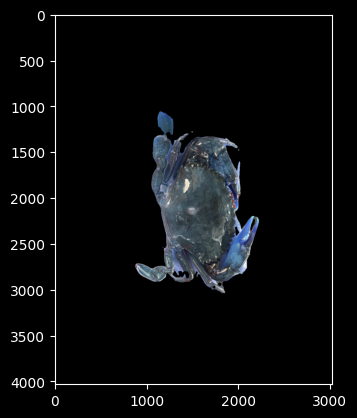

In [7]:
crab_shift = np.roll(crab, 250, axis=0)

plt.imshow(crab_shift)



In [8]:
crab_with_mesh = crab_shift.copy()

for i in range(with_mesh.shape[0]):
    for j in range(with_mesh.shape[1]):
        if not all(with_mesh[i, j] == 0):
            crab_with_mesh[i, j] = with_mesh[i, j]

crab_no_mesh = crab_shift.copy()

for i in range(rem_mesh_cover.shape[0]):
    for j in range(rem_mesh_cover.shape[1]):
        if not all(rem_mesh_cover[i, j] == 0):
            crab_no_mesh[i, j] = rem_mesh_cover[i, j]

KeyboardInterrupt: 

In [ ]:
crab_fullmesh = crab_shift.copy()

for i in range(cover_fullmesh.shape[0]):
    for j in range(cover_fullmesh.shape[1]):
        if not all(cover_fullmesh[i, j] == 0):
            crab_fullmesh[i, j] = cover_fullmesh[i, j]

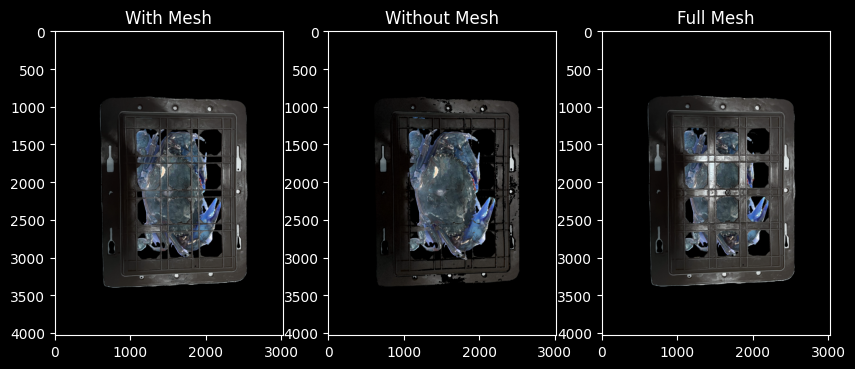

In [ ]:
# subplots of original and without mesh crab

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(crab_with_mesh)
axs[0].set_title('With Mesh')
axs[1].imshow(crab_no_mesh)
axs[1].set_title('Without Mesh')
axs[2].imshow(crab_fullmesh)
axs[2].set_title('Full Mesh')

plt.show()

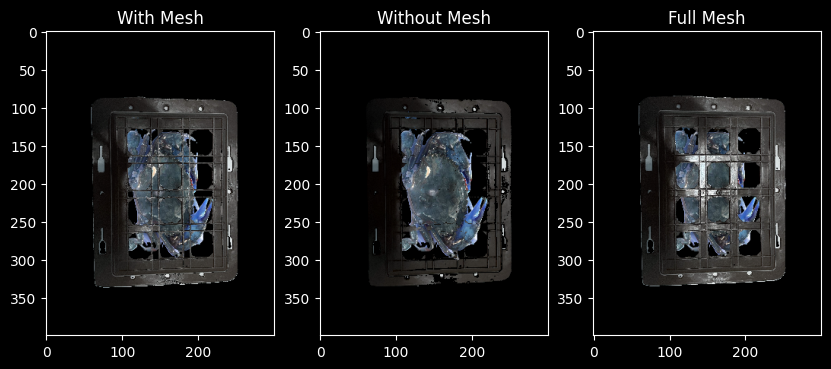

In [ ]:
# resize the image to 400x300

crab_with_mesh_resized = cv2.resize(crab_with_mesh, (300, 400))
crab_no_mesh_resized = cv2.resize(crab_no_mesh, (300, 400))
crab_fullmesh_resized = cv2.resize(crab_fullmesh, (300, 400))

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(crab_with_mesh_resized)
axs[0].set_title('With Mesh')
axs[1].imshow(crab_no_mesh_resized)
axs[1].set_title('Without Mesh')
axs[2].imshow(crab_fullmesh_resized)
axs[2].set_title('Full Mesh')

plt.show()

In [ ]:
# fill background with 106, 86, 36

bg_crab_with_mesh = crab_with_mesh_resized.copy()
bg_crab_no_mesh = crab_no_mesh_resized.copy()
bg_crab_fullmesh = crab_fullmesh_resized.copy()

for i in range(crab_with_mesh_resized.shape[0]):
    for j in range(crab_with_mesh_resized.shape[1]):
        if all(crab_with_mesh_resized[i, j] == 0):
            bg_crab_with_mesh[i, j] = [106, 86, 36]

for i in range(crab_no_mesh_resized.shape[0]):
    for j in range(crab_no_mesh_resized.shape[1]):
        if all(crab_no_mesh_resized[i, j] == 0):
            bg_crab_no_mesh[i, j] = [106, 86, 36]

for i in range(crab_fullmesh_resized.shape[0]):
    for j in range(crab_fullmesh_resized.shape[1]):
        if all(crab_fullmesh_resized[i, j] == 0):
            bg_crab_fullmesh[i, j] = [106, 86, 36]


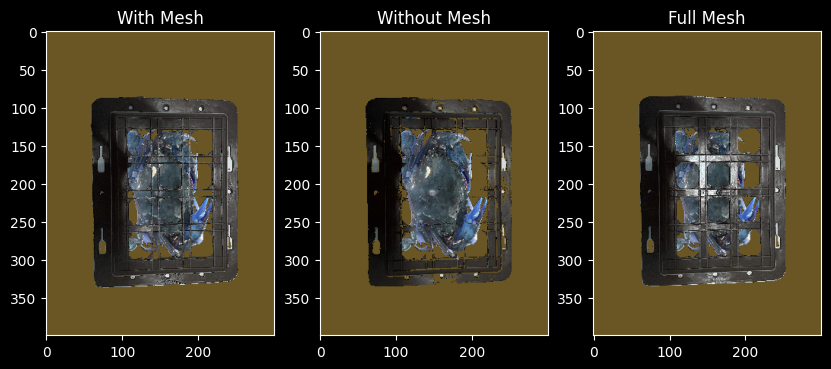

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(bg_crab_with_mesh)
axs[0].set_title('With Mesh')
axs[1].imshow(bg_crab_no_mesh)
axs[1].set_title('Without Mesh')
axs[2].imshow(bg_crab_fullmesh)
axs[2].set_title('Full Mesh')

plt.show()

In [ ]:
# save the images

cv2.imwrite('./final_box/crab_with_mesh.png', crab_with_mesh_resized)
cv2.imwrite('./final_box/crab_no_mesh.png', crab_no_mesh_resized)
cv2.imwrite('./final_box/crab_fullmesh.png', crab_fullmesh_resized)


True

In [ ]:
from datagenerator import DataGenerator, GenerateParams

In [ ]:

params = GenerateParams(rotate_angle=[30, 60, 90], scale=[0.5, 0.8, 1.5, 2.], crab_flip=True, object_flip_h=True, object_flip_v=True)

gen = DataGenerator(crab, rem_mesh_cover, cover_fullmesh)

data = gen.generate(params)

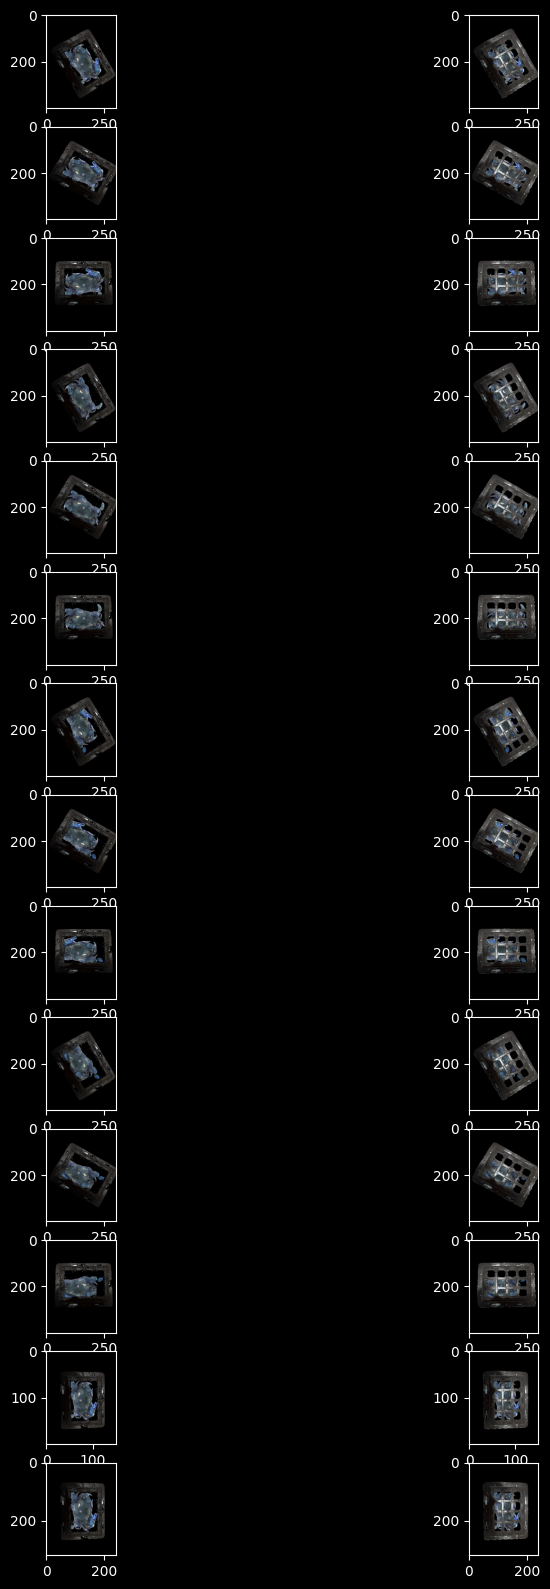

In [ ]:
# subplot, 2 images per row
fig, axs = plt.subplots(len(data)//2, 2, figsize=(10, 20))
for i in range(len(gen.obj)//2):
  axs[i, 0].imshow(gen.obj[i][0])
  axs[i, 1].imshow(gen.obj[i][1])

# plt.show()


In [ ]:
img_size = (4000, 3000)
img_color = (106, 86, 36)
obj_per_image = 10
n = 1

img = gen.insert_in_image(img_size, img_color, obj_per_image, n)



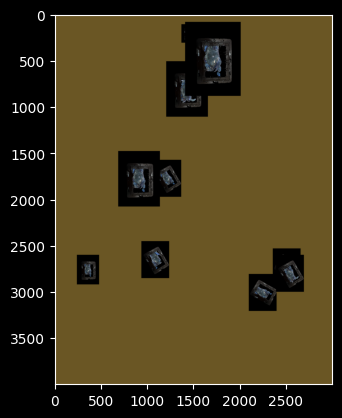

In [ ]:
plt.imshow(img[0][0])